# LBPH Algorithm 

In [2]:
import cv2
import os
import numpy as np
from pathlib import Path    
import matplotlib.pyplot as plt
%matplotlib inline
from numba import autojit

###### In this line, we just import the library we needed in the program. For example, OpenCV module, os module (for reading training data directories and paths), numpy,  matplotlib(display our images) and import 

In [21]:
@autojit
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('C:\\OpenCv\\opencv\\sources\\data\\lbpcascades\\lbpcascade_frontalface.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
    if (len(faces) == 0):
        return None, None
    (x, y, w, h) = faces[0]
    cv2.imshow("Training on image...", gray[y:y+w, x:x+h])
    cv2.waitKey(100)
    return gray[y:y+w, x:x+h], faces[0]

###### In this line, we use autojit to speed up the function by using GPU.  And use opencv.cvtcolor to convert the image into gray to make it more robust. Use opencv model to cascadeclassifier, to extract the face part of the image to save the time in lbpg model.  If there is no face, we just return None. But if there are faces, we would pick out the first one in the faces array to make it as the main face in this image. 

In [3]:
@autojit
def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)
    faces = []
    labels = []
    print(data_folder_path)
    for dir_name in dirs:
        label = dir_name
        subject_dir_path = data_folder_path + "/" + dir_name
        subject_images_names = os.listdir(subject_dir_path)
        if len(subject_images_names)<30:
            continue
        for image_name in subject_images_names:
            print(image_name)
            image_path = subject_dir_path + "/" + image_name
            print(image_path)
            image = cv2.imread(image_path) 
            cv2.imshow("Training on image...", image)
            cv2.waitKey(100)
            face, rect = detect_face(image)
            
            if face is not None:
                #add face to list of faces
                faces.append(face)
                #add label for this face
                labels.append(label)
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
   
    return faces, labels

NameError: name 'autojit' is not defined

###### This function will read all persons' training images, detect face from each image, and will return two lists of exactly same size, one list of faces and another list of labels for each face.
###### ------STEP-1--------
      use "dir" to get the directories (one directory for each subject) in data folder
      use "faces[]" to list to hold all subject faces
      use "labels[]" to list to hold labels for all subjects
###### ------STEP-2--------
      extract label number of subject from dir_name 
      format of dir name = slabel
      build path of directory containin images for current subject subject
      sample subject_dir_path = "./training-data/lfw"
      use "subject_images_names" to get the images names that are inside the given subject directory
###### ------STEP-3--------
       use the for loop "for image_name in subject_images_names:" togo through each image name, read image, detect face and add face to list of faces.
       build image path by "image_path" and sample image path = training-data/lfw/sample.jpg
       use "image" to read image from the "image_path"
       display an image window to show the image by cv2.imshow()
       use "detect_face(image)" function to get the face in the image.
###### ------STEP-4--------
       For the purpose of this tutorial, we will ignore faces that are not detected(empty face). And put the faces and labels into the array.

In [22]:
print("Preparing data...")
faces, labels = prepare_training_data("./training-data/lfw")
print("Data prepared")
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
./training-data/lfw
./training-data/lfw/Aaron_Eckhart
['Aaron_Eckhart_0001.jpg'] 1
./training-data/lfw/Aaron_Guiel
['Aaron_Guiel_0001.jpg'] 1
./training-data/lfw/Aaron_Patterson
['Aaron_Patterson_0001.jpg'] 1
./training-data/lfw/Aaron_Peirsol
['Aaron_Peirsol_0001.jpg', 'Aaron_Peirsol_0002.jpg', 'Aaron_Peirsol_0003.jpg', 'Aaron_Peirsol_0004.jpg'] 4
./training-data/lfw/Aaron_Pena
['Aaron_Pena_0001.jpg'] 1
./training-data/lfw/Aaron_Sorkin
['Aaron_Sorkin_0001.jpg', 'Aaron_Sorkin_0002.jpg'] 2
./training-data/lfw/Aaron_Tippin
['Aaron_Tippin_0001.jpg'] 1
./training-data/lfw/Abbas_Kiarostami
['Abbas_Kiarostami_0001.jpg'] 1
./training-data/lfw/Abba_Eban
['Abba_Eban_0001.jpg'] 1
./training-data/lfw/Abdel_Aziz_Al-Hakim
['Abdel_Aziz_Al-Hakim_0001.jpg'] 1
./training-data/lfw/Abdel_Madi_Shabneh
['Abdel_Madi_Shabneh_0001.jpg'] 1
./training-data/lfw/Abdel_Nasser_Assidi
['Abdel_Nasser_Assidi_0001.jpg', 'Abdel_Nasser_Assidi_0002.jpg'] 2
./training-data/lfw/Abdoulaye_Wade
['Abdoulaye_Wa

Alejandro_Toledo_0002.jpg
./training-data/lfw/Alejandro_Toledo/Alejandro_Toledo_0002.jpg
Alejandro_Toledo_0003.jpg
./training-data/lfw/Alejandro_Toledo/Alejandro_Toledo_0003.jpg
Alejandro_Toledo_0004.jpg
./training-data/lfw/Alejandro_Toledo/Alejandro_Toledo_0004.jpg
Alejandro_Toledo_0005.jpg
./training-data/lfw/Alejandro_Toledo/Alejandro_Toledo_0005.jpg
Alejandro_Toledo_0006.jpg
./training-data/lfw/Alejandro_Toledo/Alejandro_Toledo_0006.jpg
Alejandro_Toledo_0007.jpg
./training-data/lfw/Alejandro_Toledo/Alejandro_Toledo_0007.jpg
Alejandro_Toledo_0008.jpg
./training-data/lfw/Alejandro_Toledo/Alejandro_Toledo_0008.jpg
Alejandro_Toledo_0009.jpg
./training-data/lfw/Alejandro_Toledo/Alejandro_Toledo_0009.jpg
Alejandro_Toledo_0010.jpg
./training-data/lfw/Alejandro_Toledo/Alejandro_Toledo_0010.jpg
Alejandro_Toledo_0011.jpg
./training-data/lfw/Alejandro_Toledo/Alejandro_Toledo_0011.jpg
Alejandro_Toledo_0012.jpg
./training-data/lfw/Alejandro_Toledo/Alejandro_Toledo_0012.jpg
Alejandro_Toledo_0013

Alvaro_Uribe_0003.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0003.jpg
Alvaro_Uribe_0004.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0004.jpg
Alvaro_Uribe_0005.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0005.jpg
Alvaro_Uribe_0006.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0006.jpg
Alvaro_Uribe_0007.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0007.jpg
Alvaro_Uribe_0008.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0008.jpg
Alvaro_Uribe_0009.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0009.jpg
Alvaro_Uribe_0010.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0010.jpg
Alvaro_Uribe_0011.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0011.jpg
Alvaro_Uribe_0012.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0012.jpg
Alvaro_Uribe_0013.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0013.jpg
Alvaro_Uribe_0014.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0014.jpg
Alvaro_Uribe_0015.jpg
./training-data/lfw/Alvaro_Uribe/Alvaro_Uribe_0015.jpg

KeyboardInterrupt: 

######  To prepare our training data, the data will be in two lists of same size,which means one list will contain all the faces and other list will contain respective labels for each face and then print total faces and labels. 

In [7]:
labels_reshape = np.reshape(labels, (-1,1)) 

###### To get the trainning model train the data easy to just reshape the data. 

In [8]:
from sklearn.model_selection import train_test_split
import random
faces_train,faces_test,labels_train,labels_test = train_test_split(faces, labels, test_size = 0.2, random_state = random.randint(0, 100))

###### Use the the train_test_split to split the faces and labels into train and test parts randomly.

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels_reshape)
labels_encode_train= le.transform(labels_train)

E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###### Use LabelEncoder to change the label into 0 to n, which can help you get a better trainning result.

In [10]:
#train our face recognizer of our training faces
@autojit
def train(faces,labels_encode):
    face_recognizer = cv2.face.LBPHFaceRecognizer_create(radius = 1,neighbors = 12,grid_x = 4,grid_y = 4)
    face_recognizer.train(faces, labels_encode)
    return face_recognizer

###### Get the face recognizer model by use the data.

In [11]:
face_recognizer = train(faces_train,labels_encode_train)

##### convey the data of model from the function to the face_recognizer parameter. 

In [13]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

##### draw_rectangle by using function to draw rectangle on image ,according to given (x, y) coordinates and given width and heigh
###### function to draw text on give image starting from passed (x, y) coordinates. 


In [12]:
def predict(test_img):
    img = test_img.copy()
    face, rect = detect_face(img)
    label= face_recognizer.predict(face)
    print(label)
    draw_rectangle(img, rect)
    if(label[0]!=-1):
        text = le.inverse_transform([label[0]])[0]
    else:
        text = "Cannot find"  
    draw_text(img, text, rect[0], rect[1]-5)
    
    return img

##### This function recognizes the person in image passed and draws a rectangle around detected face with name of the  subject.
##### use img to make a copy of the image as we don't want to chang original image
##### use detect_face function to detect face from the image
##### predict the image using our face recognizer by use the face_recognizer model and get the output by label
##### get name of respective label returned by face recognizer (label_text = labels_encode[label[0]]) and draw a rectangle around face detected
##### draw name of predicted person

In [18]:
def test(faces,labels_encode):
    total = 0
    matches = 0
    for i in range(len(faces)):
        label_predict = face_recognizer.predict(faces[i])
        print(label_predict)
        print(labels_encode[i])
        total += 1
        if labels_encode[i] == label_predict[0]:
            matches += 1
            
    print("Total accuracy is :"+str(matches/total))
    return None

##### Use this function to calculate the number of predictions that match the original labels to get the accuracy.

In [15]:
labels_encode1 = le.transform(np.reshape(labels_test, (-1,1)) )

E:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Just reshape the test data to make the check of accuracy easier.

In [19]:
test(faces_test,labels_encode1)

(8, 10.90414052650094)
17
(22, 13.904152483593565)
31
(31, 11.094329350471632)
31
(7, 11.5744372055179)
5
(8, 14.711055673608573)
31
(22, 12.149115778043313)
8
(27, 12.117699973548731)
27
(20, 13.441998598149818)
20
(7, 12.322585908453384)
1
(17, 12.591254277115175)
31
(8, 12.314991064600784)
8
(15, 11.47306466712923)
9
(23, 11.416142865614905)
4
(8, 11.080494375504802)
8
(8, 12.020702767449624)
31
(29, 10.844189836776618)
29
(7, 10.709133282613898)
7
(22, 12.906216808359089)
5
(3, 12.64944286418232)
2
(7, 12.553191891174386)
8
(31, 11.424069370503764)
8
(5, 11.832548641916716)
5
(13, 10.353920732600457)
13
(33, 11.16725733902098)
33
(10, 11.05382465529365)
10
(8, 11.682504751833859)
30
(19, 9.455384668462179)
19
(15, 11.826657029137554)
15
(30, 11.969711948806337)
30
(8, 11.915956227066104)
8
(31, 11.332640157545221)
31
(9, 12.253366954281706)
9
(8, 12.460328427525726)
32
(8, 14.342393094206887)
29
(8, 10.944065692391142)
7
(6, 12.00131449822799)
6
(9, 12.457674811315117)
9
(3, 13.097

(8, 10.724802753476528)
8
(8, 13.75360658669081)
8
(8, 10.612137531057062)
8
(27, 11.490549318578763)
30
(8, 11.270614613220282)
8
(27, 11.545143706833958)
27
(9, 15.415895076606185)
14
(8, 13.64623743360726)
8
(30, 11.241826213380124)
30
(2, 13.320542990518897)
2
(9, 11.696234308781571)
31
(5, 10.476713957716916)
5
(8, 11.521366625153767)
8
(31, 13.45536464024877)
31
(9, 13.997699282059928)
20
(30, 12.355628911939277)
25
(4, 11.865381607021284)
8
(8, 13.654257713854973)
8
(5, 12.657563564815128)
5
(8, 11.624166896878677)
13
(13, 14.126756125851147)
16
(22, 12.843671243675537)
0
(8, 11.293057170946811)
8
(8, 11.484969391232303)
8
(8, 12.008727345150374)
1
(8, 10.533299777886393)
8
(14, 13.285587590057672)
10
(5, 12.775690913637495)
29
(9, 10.531659018596606)
9
(30, 11.501013997925726)
30
(17, 11.096132172964872)
17
(8, 14.078337873308326)
3
(21, 10.533395481058111)
21
(31, 11.138657708614817)
2
(5, 12.067769203930348)
5
(8, 10.748684698535001)
8
(5, 11.737265825205899)
5
(17, 12.432514

##### In this line, the test function give us the result of the preduiction, the original data, and the outcome of the accuracy.

Predicting images...
(25, 12.65790070895928)
(5, 13.348393218258636)
Prediction complete


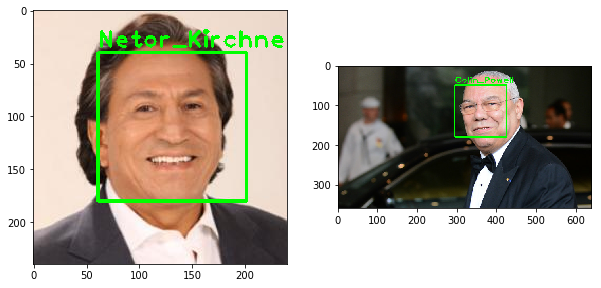

In [20]:
print("Predicting images...")

#load test images
test_img1 = cv2.imread("training-data/testdata/Alejandro_Toledo/Alejandro_Toledo_test_0002.jpg")
test_img2 = cv2.imread("training-data/s1/Colin_Powell_test3.jpg")
#perform a prediction
predicted_img1 = predict(test_img1)
predicted_img2 = predict(test_img2)
print("Prediction complete")

#create a figure of 2 plots (one for each test image)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#display test image1 result
ax1.imshow(cv2.cvtColor(predicted_img1, cv2.COLOR_BGR2RGB))

#display test image2 result
ax2.imshow(cv2.cvtColor(predicted_img2, cv2.COLOR_BGR2RGB))

#display both images
cv2.imshow("Tom cruise test", predicted_img1)
cv2.imshow("Shahrukh Khan test", predicted_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.destroyAllWindows()

##### In this line, we just give out two example of prediction.